<h1>Data Cleaning and Preprocessing </h1>

<h2>import library</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read file</h2>

In [2]:
df=pd.read_csv('cardio_train.csv', sep=';')
df = df.drop(columns=["id"])
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<h2>Age count</h2>

In [3]:
df['age_years'] = df['age'] // 365
print("Min: ",df['age_years'].min())
print("Max: ",df['age_years'].max())
print("Mean: ",df['age_years'].mean())

Min:  29
Max:  64
Mean:  52.840671428571426


<h2>Count BMI</h2>

In [4]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
print("Min: ",df['bmi'].min())
print("Max: ",df['bmi'].max())
print("Mean: ",df['bmi'].mean())

Min:  3.471783865673526
Max:  298.6666666666667
Mean:  27.55651255127886


<h2>Remove unvalid height and weight</h2>

In [5]:
df = df[(df['height'] >= 140) & (df['height'] <= 210)]
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]

In [6]:
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 200)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)]
df = df[df['ap_hi'] >= df['ap_lo']]
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


<h2>Histogram</h2>

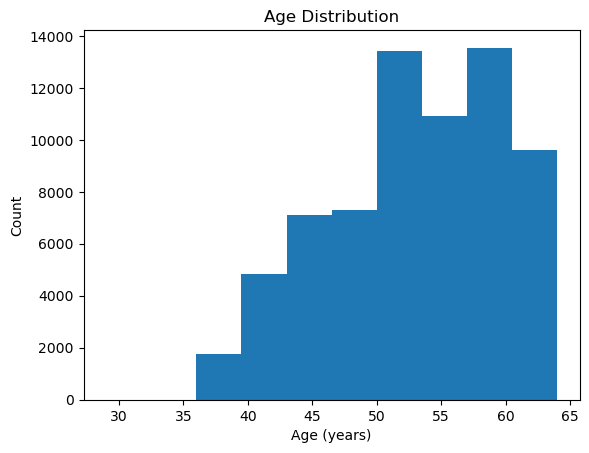

In [7]:
plt.hist(df['age_years'])
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

<h2>Duplicate check And Remove</h2>

In [8]:
 df.duplicated().sum()

24

In [9]:
df.drop_duplicates()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


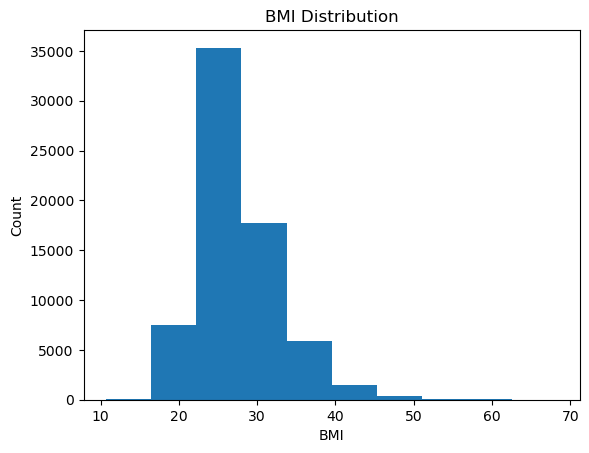

In [10]:
plt.hist(df['bmi'])
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

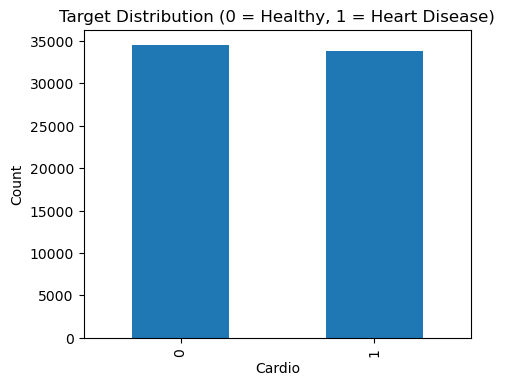

In [11]:
plt.figure(figsize=(5,4))
df['cardio'].value_counts().plot(kind='bar')
plt.title("Target Distribution (0 = Healthy, 1 = Heart Disease)")
plt.xlabel("Cardio")
plt.ylabel("Count")
plt.show()

<h2>Age histogram</h2>

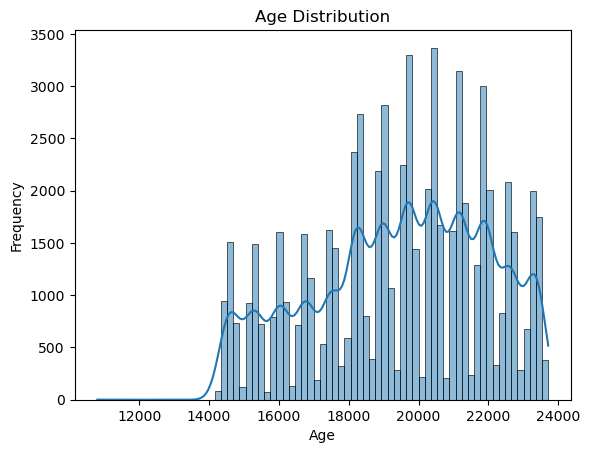

In [12]:
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<h2>Heatmap visualization</h2>

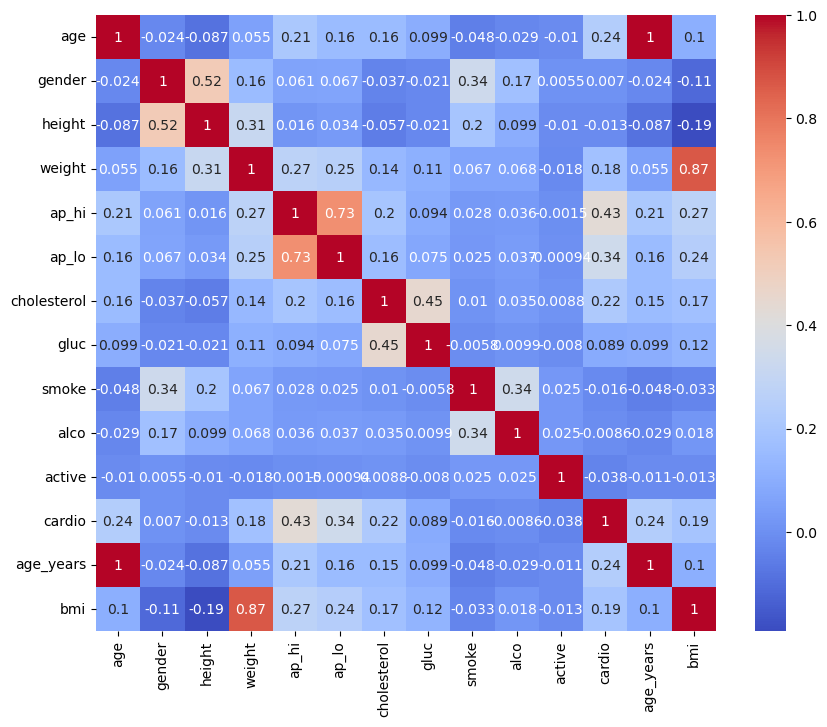

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


<h2>save file</h2>

In [15]:
df.to_csv('ml_week2.csv',index=False)